# MELO Simulator and Subgame Search Testing Notebook

This notebook tests the MELO simulator adapter and subgame search implementation with the fixed code.

## Contents:
1. Setup and Environment Configuration
2. Testing Individual Strategy Profiles
3. Running Subgame Search
4. Analyzing Results

## 1. Setup and Environment Configuration

In [20]:
import os
import sys
import logging
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

# Add the project directory to the path
project_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
if project_dir not in sys.path:
    sys.path.insert(0, project_dir)

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)

# Print debug information
print(f"Current directory: {os.getcwd()}")
print(f"Python path: {sys.path}")

Current directory: /Users/gabesmithline/Desktop/SRG/melo_project/marketsim/egta/subgame_search
Python path: ['/Users/gabesmithline/Desktop/SRG/melo_project', '/Users/gabesmithline/Desktop/SRG/melo_project/marketsim', '/Users/gabesmithline/.pyenv/versions/3.11.9/lib/python311.zip', '/Users/gabesmithline/.pyenv/versions/3.11.9/lib/python3.11', '/Users/gabesmithline/.pyenv/versions/3.11.9/lib/python3.11/lib-dynload', '', '/Users/gabesmithline/.pyenv/versions/3.11.9/lib/python3.11/site-packages', '/Users/gabesmithline/Desktop/SRG/melo_project/marketsim']


In [21]:
# Import the necessary modules
from melo_simulator_adapter import MeloSimulatorAdapter
from subgame_search import SubgameSearch
from symmetric_game import SymmetricGame
from run_subgame_search import run_subgame_search

print("Successfully imported EGTA modules!")

Successfully imported EGTA modules!


## 2. Testing Individual Strategy Profiles

In [22]:
# Create an instance of the MeloSimulatorAdapter with optimized parameters
adapter = MeloSimulatorAdapter(
    num_background_agents=20,  # Reduced for faster simulations
    sim_time=12000,
    num_assets=1,
    num_simulations=5,  # Reduced for faster testing
    lam=5e-2,           # Arrival rate
    mean=1e5,           # Mean fundamental value (100,000)
    r=0.05,             # Interest rate
    shock_var=5e6,      # Variance for price shocks (5,000,000)
    q_max=10,           # Maximum quantity
    pv_var=5e6,         # Variance for private values
    shade=[500, 1000]   # Shading parameter
)

print("Created MeloSimulatorAdapter instance")

Created MeloSimulatorAdapter instance


### Test 1: MELO_Only vs CDA_Only

In [23]:
# Test a profile with one agent using MELO_Only and one agent using CDA_Only
profile1 = {'MELO_Only': 1, 'CDA_Only': 1}
payoffs1 = adapter.simulate_profile(profile1)
print(f"Payoffs for profile {profile1}: {payoffs1}")

2025-03-11 16:21:43,152 - melo_simulator_adapter - INFO - Simulating profile: {'MELO_Only': 1, 'CDA_Only': 1} with parameters: {'lam': 0.05, 'mean': 100000.0, 'r': 0.05, 'shock_var': 5000000.0, 'q_max': 10, 'pv_var': 5000000.0, 'shade': [500, 1000]}
2025-03-11 16:21:43,153 - melo_simulator_adapter - INFO - Running simulation 1/5...
2025-03-11 16:21:43,156 - melo_simulator_adapter - INFO - Simulator has 21 agents
2025-03-11 16:21:43,156 - melo_simulator_adapter - INFO - Agent IDs in simulator: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
2025-03-11 16:21:43,156 - melo_simulator_adapter - INFO - Using agent IDs for strategies: [19, 20]
2025-03-11 16:21:43,156 - melo_simulator_adapter - INFO - Starting simulation run...
2025-03-11 16:21:43,369 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:21:43,369 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:21:43,372 - melo_simulator_adapter - I

At the end of the simulation we get {0: tensor(1977.6719), 1: tensor(-2051.8984), 2: tensor(1975.5000), 3: tensor(-3146.), 4: tensor(2763.4375), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(1977.6719), 1: tensor(-2051.8984), 2: tensor(1975.5000), 3: tensor(-3146.), 4: tensor(2763.4375), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simu

2025-03-11 16:21:43,591 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:21:43,591 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:21:43,597 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(-672.7031), 1: tensor(2067.9688), 2: tensor(2633.8125), 3: tensor(0.), 4: tensor(-1874.2500), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:21:43,597 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:21:43,597 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:21:43,598 - melo_simulator_adapter - INFO - Agent strategies: {19: 'MELO_Onl

At the end of the simulation we get {0: tensor(-672.7031), 1: tensor(2067.9688), 2: tensor(2633.8125), 3: tensor(0.), 4: tensor(-1874.2500), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(-672.7031), 1: tensor(2067.9688), 2: tensor(2633.8125), 3: tensor(0.), 4: tensor(-1874.2500), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation w

2025-03-11 16:21:43,885 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:21:43,885 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:21:43,888 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(-15205.0156), 1: tensor(23147.0312), 2: tensor(3572.0938), 3: tensor(-11334.0391), 4: tensor(-1158.6062), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:21:43,889 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:21:43,889 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:21:43,889 - melo_simulator_adapter - INFO - Agent strategies: {1

At the end of the simulation we get {0: tensor(-15205.0156), 1: tensor(23147.0312), 2: tensor(3572.0938), 3: tensor(-11334.0391), 4: tensor(-1158.6062), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(-15205.0156), 1: tensor(23147.0312), 2: tensor(3572.0938), 3: tensor(-11334.0391), 4: tensor(-1158.6062), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the

2025-03-11 16:21:44,100 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:21:44,100 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:21:44,103 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(60135.5625), 1: tensor(-40802.6562), 2: tensor(0.), 3: tensor(14980.4219), 4: tensor(-27191.4688), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:21:44,103 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:21:44,103 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:21:44,103 - melo_simulator_adapter - INFO - Agent strategies: {19: 'MEL

At the end of the simulation we get {0: tensor(60135.5625), 1: tensor(-40802.6562), 2: tensor(0.), 3: tensor(14980.4219), 4: tensor(-27191.4688), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(60135.5625), 1: tensor(-40802.6562), 2: tensor(0.), 3: tensor(14980.4219), 4: tensor(-27191.4688), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the si

2025-03-11 16:21:44,317 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:21:44,317 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:21:44,320 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(0.), 1: tensor(0.), 2: tensor(339.6016), 3: tensor(1118.6172), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:21:44,321 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:21:44,321 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:21:44,322 - melo_simulator_adapter - INFO - Agent strategies: {19: 'MELO_Only', 20: 'CDA_Onl

At the end of the simulation we get {0: tensor(0.), 1: tensor(0.), 2: tensor(339.6016), 3: tensor(1118.6172), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(0.), 1: tensor(0.), 2: tensor(339.6016), 3: tensor(1118.6172), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4

### Test 2: Balanced Strategy

In [24]:
# Test a profile with two agents using the Balanced strategy
profile2 = {'Balanced': 2}
payoffs2 = adapter.simulate_profile(profile2)
print(f"Payoffs for profile {profile2}: {payoffs2}")

2025-03-11 16:21:44,334 - melo_simulator_adapter - INFO - Simulating profile: {'Balanced': 2} with parameters: {'lam': 0.05, 'mean': 100000.0, 'r': 0.05, 'shock_var': 5000000.0, 'q_max': 10, 'pv_var': 5000000.0, 'shade': [500, 1000]}
2025-03-11 16:21:44,356 - melo_simulator_adapter - INFO - Running simulation 1/5...
2025-03-11 16:21:44,362 - melo_simulator_adapter - INFO - Simulator has 21 agents
2025-03-11 16:21:44,363 - melo_simulator_adapter - INFO - Agent IDs in simulator: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
2025-03-11 16:21:44,363 - melo_simulator_adapter - INFO - Using agent IDs for strategies: [19, 20]
2025-03-11 16:21:44,363 - melo_simulator_adapter - INFO - Starting simulation run...
2025-03-11 16:21:44,595 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:21:44,595 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:21:44,598 - melo_simulator_adapter - INFO - Got CDA va

At the end of the simulation we get {0: tensor(0.), 1: tensor(0.), 2: tensor(0.), 3: tensor(0.), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(0.), 1: tensor(0.), 2: tensor(0.), 3: tensor(0.), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 

2025-03-11 16:21:44,859 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:21:44,859 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:21:44,862 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(0.), 1: tensor(6024.2734), 2: tensor(-5605.0312), 3: tensor(6919.5234), 4: tensor(-6795.7422), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:21:44,862 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:21:44,862 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:21:44,862 - melo_simulator_adapter - INFO - Agent strategies: {19: 'Balance

At the end of the simulation we get {0: tensor(0.), 1: tensor(6024.2734), 2: tensor(-5605.0312), 3: tensor(6919.5234), 4: tensor(-6795.7422), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(0.), 1: tensor(6024.2734), 2: tensor(-5605.0312), 3: tensor(6919.5234), 4: tensor(-6795.7422), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation

2025-03-11 16:21:45,069 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:21:45,069 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:21:45,072 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(-291.5391), 1: tensor(0.), 2: tensor(0.), 3: tensor(0.), 4: tensor(-392.6328), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:21:45,072 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:21:45,072 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:21:45,072 - melo_simulator_adapter - INFO - Agent strategies: {19: 'Balanced', 20: 'Balance

At the end of the simulation we get {0: tensor(-291.5391), 1: tensor(0.), 2: tensor(0.), 3: tensor(0.), 4: tensor(-392.6328), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(-291.5391), 1: tensor(0.), 2: tensor(0.), 3: tensor(0.), 4: tensor(-392.6328), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0,

2025-03-11 16:21:45,291 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:21:45,291 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:21:45,295 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(1850.0234), 1: tensor(-3150.5938), 2: tensor(13637.1562), 3: tensor(-2432.9272), 4: tensor(-6280.3125), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:21:45,295 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:21:45,295 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:21:45,295 - melo_simulator_adapter - INFO - Agent strategies: {19:

At the end of the simulation we get {0: tensor(1850.0234), 1: tensor(-3150.5938), 2: tensor(13637.1562), 3: tensor(-2432.9272), 4: tensor(-6280.3125), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(1850.0234), 1: tensor(-3150.5938), 2: tensor(13637.1562), 3: tensor(-2432.9272), 4: tensor(-6280.3125), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end

2025-03-11 16:21:45,518 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:21:45,519 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:21:45,521 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(100584.8438), 1: tensor(-17844.0625), 2: tensor(-20102.5625), 3: tensor(-313.2003), 4: tensor(-56730.4688), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:21:45,522 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:21:45,522 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:21:45,522 - melo_simulator_adapter - INFO - Agent strategies: 

At the end of the simulation we get {0: tensor(100584.8438), 1: tensor(-17844.0625), 2: tensor(-20102.5625), 3: tensor(-313.2003), 4: tensor(-56730.4688), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(100584.8438), 1: tensor(-17844.0625), 2: tensor(-20102.5625), 3: tensor(-313.2003), 4: tensor(-56730.4688), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At

### Test 3: Multiple Strategies

In [25]:
# Test a profile with multiple strategies
profile3 = {'MELO_Only': 1, 'CDA_Only': 1, 'Balanced': 1, 'MELO_Biased': 1, 'CDA_Biased': 1}
payoffs3 = adapter.simulate_profile(profile3)
print(f"Payoffs for profile {profile3}: {payoffs3}")

2025-03-11 16:21:45,530 - melo_simulator_adapter - INFO - Simulating profile: {'MELO_Only': 1, 'CDA_Only': 1, 'Balanced': 1, 'MELO_Biased': 1, 'CDA_Biased': 1} with parameters: {'lam': 0.05, 'mean': 100000.0, 'r': 0.05, 'shock_var': 5000000.0, 'q_max': 10, 'pv_var': 5000000.0, 'shade': [500, 1000]}
2025-03-11 16:21:45,530 - melo_simulator_adapter - INFO - Running simulation 1/5...
2025-03-11 16:21:45,534 - melo_simulator_adapter - INFO - Simulator has 21 agents
2025-03-11 16:21:45,534 - melo_simulator_adapter - INFO - Agent IDs in simulator: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
2025-03-11 16:21:45,534 - melo_simulator_adapter - INFO - Using agent IDs for strategies: [16, 17, 18, 19, 20]
2025-03-11 16:21:45,534 - melo_simulator_adapter - INFO - Starting simulation run...
2025-03-11 16:21:45,790 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:21:45,791 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new f

At the end of the simulation we get {0: tensor(2628.5312), 1: tensor(2151.3125), 2: tensor(1781.0078), 3: tensor(386.9297), 4: tensor(-1739.0598), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(2628.5312), 1: tensor(2151.3125), 2: tensor(1781.0078), 3: tensor(386.9297), 4: tensor(-1739.0598), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the 

2025-03-11 16:21:46,012 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:21:46,012 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:21:46,015 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(1233.5746), 1: tensor(12132.4844), 2: tensor(-12860.8203), 3: tensor(-10491.0156), 4: tensor(10004.3906), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:21:46,015 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:21:46,015 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:21:46,016 - melo_simulator_adapter - INFO - Agent strategies: {1

At the end of the simulation we get {0: tensor(1233.5746), 1: tensor(12132.4844), 2: tensor(-12860.8203), 3: tensor(-10491.0156), 4: tensor(10004.3906), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(1233.5746), 1: tensor(12132.4844), 2: tensor(-12860.8203), 3: tensor(-10491.0156), 4: tensor(10004.3906), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the

2025-03-11 16:21:46,235 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:21:46,235 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:21:46,238 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(9694.9531), 1: tensor(-8216.0938), 2: tensor(-3216.0547), 3: tensor(4667.5312), 4: tensor(-1131.3572), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:21:46,238 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:21:46,238 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:21:46,239 - melo_simulator_adapter - INFO - Agent strategies: {16: 

At the end of the simulation we get {0: tensor(9694.9531), 1: tensor(-8216.0938), 2: tensor(-3216.0547), 3: tensor(4667.5312), 4: tensor(-1131.3572), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(9694.9531), 1: tensor(-8216.0938), 2: tensor(-3216.0547), 3: tensor(4667.5312), 4: tensor(-1131.3572), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end o

2025-03-11 16:21:46,511 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:21:46,511 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:21:46,514 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(491.7644), 1: tensor(826.7812), 2: tensor(1023.1562), 3: tensor(-958.1406), 4: tensor(-715.2812), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:21:46,514 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:21:46,514 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:21:46,515 - melo_simulator_adapter - INFO - Agent strategies: {16: 'MELO

At the end of the simulation we get {0: tensor(491.7644), 1: tensor(826.7812), 2: tensor(1023.1562), 3: tensor(-958.1406), 4: tensor(-715.2812), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(491.7644), 1: tensor(826.7812), 2: tensor(1023.1562), 3: tensor(-958.1406), 4: tensor(-715.2812), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simu

2025-03-11 16:21:46,728 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:21:46,729 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:21:46,732 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(-2467.0859), 1: tensor(-9131.8438), 2: tensor(0.), 3: tensor(5708.5625), 4: tensor(6054.5000), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:21:46,732 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:21:46,732 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:21:46,732 - melo_simulator_adapter - INFO - Agent strategies: {16: 'MELO_On

At the end of the simulation we get {0: tensor(-2467.0859), 1: tensor(-9131.8438), 2: tensor(0.), 3: tensor(5708.5625), 4: tensor(6054.5000), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(-2467.0859), 1: tensor(-9131.8438), 2: tensor(0.), 3: tensor(5708.5625), 4: tensor(6054.5000), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation

### Results Visualization

In [26]:
# Create a DataFrame to visualize results from all tests
results_data = {
    'Test 1: MELO vs CDA': [payoffs1.get('MELO_Only', 0), payoffs1.get('CDA_Only', 0), 0, 0, 0],
    'Test 2: Balanced': [0, 0, payoffs2.get('Balanced', 0), 0, 0],
    'Test 3: Multiple': [payoffs3.get('MELO_Only', 0), payoffs3.get('CDA_Only', 0), 
                         payoffs3.get('Balanced', 0), payoffs3.get('MELO_Biased', 0), 
                         payoffs3.get('CDA_Biased', 0)]
}

results_df = pd.DataFrame(results_data, index=['MELO_Only', 'CDA_Only', 'Balanced', 'MELO_Biased', 'CDA_Biased'])
results_df

,Test 1: MELO vs CDA,Test 2: Balanced,Test 3: Multiple
MELO_Only,0.0,0.0,0.0
CDA_Only,0.0,0.0,0.0
Balanced,0.0,0.0,0.0
MELO_Biased,0.0,0.0,0.0
CDA_Biased,0.0,0.0,0.0


<Figure size 1200x600 with 0 Axes>

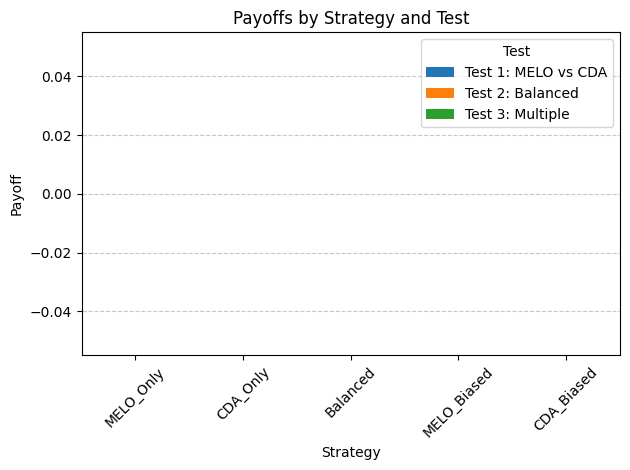

In [27]:
# Visualize the results
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar')
plt.title('Payoffs by Strategy and Test')
plt.ylabel('Payoff')
plt.xlabel('Strategy')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Test')
plt.tight_layout()
plt.show()

## 3. Running Subgame Search

### Set up the Subgame Search

In [36]:
# Define the strategy space
strategies = ['MELO_Only', 'CDA_Only', 'Balanced', 'MELO_Biased', 'CDA_Biased']
num_players = 5  # Total number of players in the game
num_actions = len(strategies)

# We need to create empty config_table and payoff_table for initialization
# These will be populated during the subgame search
config_table = np.zeros((1, num_actions))  # Start with a minimal configuration
payoff_table = np.zeros((num_actions, 1))  # Start with empty payoffs

# Create a symmetric game with the defined strategy space
game = SymmetricGame(
    num_players=num_players,
    num_actions=num_actions,
    config_table=config_table,
    payoff_table=payoff_table,
    strategy_names=strategies,
    device="cpu"
)

# Create a subgame search instance
subgame_search = SubgameSearch(
    strategy_names=strategies,
    simulator=adapter,
    num_players=num_players,
    regret_threshold=1e-3,
    distance_threshold=0.1,
    support_threshold=1e-4,
    restricted_game_size=3,
    eq_method="replicator_dynamics"
)

print("Subgame search instance created")

Subgame search instance created


### Run the Subgame Search

In [37]:
# Initialize the subgame search
subgame_search.initialize()

# Run the subgame search
results = subgame_search.run()

print("Subgame search completed")

2025-03-11 16:23:00,137 - subgame_search - INFO - Initializing subgame search with single-strategy subgames
2025-03-11 16:23:00,139 - subgame_search - INFO - Added subgame with strategies ['MELO_Only'], priority 1.000000
2025-03-11 16:23:00,140 - subgame_search - INFO - Added subgame with strategies ['CDA_Only'], priority 1.000000
2025-03-11 16:23:00,140 - subgame_search - INFO - Added subgame with strategies ['Balanced'], priority 1.000000
2025-03-11 16:23:00,140 - subgame_search - INFO - Added subgame with strategies ['MELO_Biased'], priority 1.000000
2025-03-11 16:23:00,141 - subgame_search - INFO - Added subgame with strategies ['CDA_Biased'], priority 1.000000
2025-03-11 16:23:00,141 - subgame_search - INFO - Added 5 initial single-strategy subgames
2025-03-11 16:23:00,141 - subgame_search - INFO - The algorithm will build up to larger subgames as needed
2025-03-11 16:23:00,142 - subgame_search - INFO - Starting subgame search with 100 max iterations
2025-03-11 16:23:00,142 - subg

At the end of the simulation we get {0: tensor(-5479.2812), 1: tensor(-274.0156), 2: tensor(-166.2266), 3: tensor(7070.4688), 4: tensor(2904.7734), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(-5479.2812), 1: tensor(-274.0156), 2: tensor(-166.2266), 3: tensor(7070.4688), 4: tensor(2904.7734), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of th

2025-03-11 16:23:00,690 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:00,691 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:00,693 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(6077.2891), 1: tensor(-9567.2656), 2: tensor(0.), 3: tensor(-2550.6172), 4: tensor(9637.5625), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:00,694 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:00,694 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:00,694 - melo_simulator_adapter - INFO - Agent strategies: {16: 'MELO_On

At the end of the simulation we get {0: tensor(6077.2891), 1: tensor(-9567.2656), 2: tensor(0.), 3: tensor(-2550.6172), 4: tensor(9637.5625), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(6077.2891), 1: tensor(-9567.2656), 2: tensor(0.), 3: tensor(-2550.6172), 4: tensor(9637.5625), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation

2025-03-11 16:23:00,945 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:00,945 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:00,949 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(-1262.2969), 1: tensor(-911.9008), 2: tensor(0.), 3: tensor(36.9375), 4: tensor(3753.9922), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:00,949 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:00,950 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:00,950 - melo_simulator_adapter - INFO - Agent strategies: {16: 'MELO_Only'

At the end of the simulation we get {0: tensor(-1262.2969), 1: tensor(-911.9008), 2: tensor(0.), 3: tensor(36.9375), 4: tensor(3753.9922), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(-1262.2969), 1: tensor(-911.9008), 2: tensor(0.), 3: tensor(36.9375), 4: tensor(3753.9922), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we ge

2025-03-11 16:23:01,185 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:01,185 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:01,188 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(0.), 1: tensor(0.), 2: tensor(0.), 3: tensor(0.), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:01,189 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:01,189 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:01,189 - melo_simulator_adapter - INFO - Agent strategies: {16: 'MELO_Only', 17: 'MELO_Only', 18: 'MEL

At the end of the simulation we get {0: tensor(0.), 1: tensor(0.), 2: tensor(0.), 3: tensor(0.), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(0.), 1: tensor(0.), 2: tensor(0.), 3: tensor(0.), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 

2025-03-11 16:23:01,413 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:01,413 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:01,416 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(0.), 1: tensor(2394.8672), 2: tensor(0.), 3: tensor(-251.2084), 4: tensor(-2713.8516), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:01,416 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:01,416 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:01,416 - melo_simulator_adapter - INFO - Agent strategies: {16: 'MELO_Only', 17:

At the end of the simulation we get {0: tensor(0.), 1: tensor(2394.8672), 2: tensor(0.), 3: tensor(-251.2084), 4: tensor(-2713.8516), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(0.), 1: tensor(2394.8672), 2: tensor(0.), 3: tensor(-251.2084), 4: tensor(-2713.8516), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1

2025-03-11 16:23:01,686 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:01,686 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:01,689 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(12190.7188), 1: tensor(2397.5547), 2: tensor(-8628.7812), 3: tensor(-3062.6328), 4: tensor(886.5881), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:01,689 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:01,689 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:01,690 - melo_simulator_adapter - INFO - Agent strategies: {16: '

At the end of the simulation we get {0: tensor(12190.7188), 1: tensor(2397.5547), 2: tensor(-8628.7812), 3: tensor(-3062.6328), 4: tensor(886.5881), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(12190.7188), 1: tensor(2397.5547), 2: tensor(-8628.7812), 3: tensor(-3062.6328), 4: tensor(886.5881), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of 

2025-03-11 16:23:01,909 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:01,910 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:01,912 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(0.), 1: tensor(-4582.7734), 2: tensor(0.), 3: tensor(0.), 4: tensor(4310.3281), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:01,913 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:01,913 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:01,913 - melo_simulator_adapter - INFO - Agent strategies: {16: 'Balanced', 17: 'Balanc

At the end of the simulation we get {0: tensor(0.), 1: tensor(-4582.7734), 2: tensor(0.), 3: tensor(0.), 4: tensor(4310.3281), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(0.), 1: tensor(-4582.7734), 2: tensor(0.), 3: tensor(0.), 4: tensor(4310.3281), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 

2025-03-11 16:23:02,124 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:02,124 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:02,128 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(-18336.7812), 1: tensor(31739.0938), 2: tensor(-9711.6641), 3: tensor(0.), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:02,128 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:02,128 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:02,128 - melo_simulator_adapter - INFO - Agent strategies: {16: 'Balanced', 1

At the end of the simulation we get {0: tensor(-18336.7812), 1: tensor(31739.0938), 2: tensor(-9711.6641), 3: tensor(0.), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(-18336.7812), 1: tensor(31739.0938), 2: tensor(-9711.6641), 3: tensor(0.), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0

2025-03-11 16:23:02,345 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:02,346 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:02,349 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(5429.4844), 1: tensor(0.), 2: tensor(5505.8047), 3: tensor(-4301.3516), 4: tensor(-5151.4844), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:02,349 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:02,349 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:02,350 - melo_simulator_adapter - INFO - Agent strategies: {16: 'Balance

At the end of the simulation we get {0: tensor(5429.4844), 1: tensor(0.), 2: tensor(5505.8047), 3: tensor(-4301.3516), 4: tensor(-5151.4844), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(5429.4844), 1: tensor(0.), 2: tensor(5505.8047), 3: tensor(-4301.3516), 4: tensor(-5151.4844), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation

2025-03-11 16:23:02,617 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:02,617 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:02,620 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(-30.1072), 1: tensor(741.9705), 2: tensor(-3173.7341), 3: tensor(4675.1719), 4: tensor(-2093.0859), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:02,621 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:02,621 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:02,621 - melo_simulator_adapter - INFO - Agent strategies: {16: 'Ba

At the end of the simulation we get {0: tensor(-30.1072), 1: tensor(741.9705), 2: tensor(-3173.7341), 3: tensor(4675.1719), 4: tensor(-2093.0859), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(-30.1072), 1: tensor(741.9705), 2: tensor(-3173.7341), 3: tensor(4675.1719), 4: tensor(-2093.0859), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the 

2025-03-11 16:23:02,852 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:02,852 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:02,855 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(0.), 1: tensor(-9.8256), 2: tensor(-5406.2578), 3: tensor(0.), 4: tensor(4866.8281), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:02,855 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:02,855 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:02,855 - melo_simulator_adapter - INFO - Agent strategies: {16: 'CDA_Biased', 17: 

At the end of the simulation we get {0: tensor(0.), 1: tensor(-9.8256), 2: tensor(-5406.2578), 3: tensor(0.), 4: tensor(4866.8281), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(0.), 1: tensor(-9.8256), 2: tensor(-5406.2578), 3: tensor(0.), 4: tensor(4866.8281), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0,

2025-03-11 16:23:03,076 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:03,076 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:03,079 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(9710.5078), 1: tensor(0.), 2: tensor(0.), 3: tensor(0.), 4: tensor(-8792.4688), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:03,079 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:03,079 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:03,079 - melo_simulator_adapter - INFO - Agent strategies: {16: 'CDA_Biased', 17: 'CDA_

At the end of the simulation we get {0: tensor(9710.5078), 1: tensor(0.), 2: tensor(0.), 3: tensor(0.), 4: tensor(-8792.4688), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(9710.5078), 1: tensor(0.), 2: tensor(0.), 3: tensor(0.), 4: tensor(-8792.4688), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 

2025-03-11 16:23:03,351 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:03,352 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:03,354 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(-11290.0234), 1: tensor(12862.), 2: tensor(0.), 3: tensor(-11261.7969), 4: tensor(11524.3594), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:03,355 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:03,355 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:03,355 - melo_simulator_adapter - INFO - Agent strategies: {16: 'CDA_Bia

At the end of the simulation we get {0: tensor(-11290.0234), 1: tensor(12862.), 2: tensor(0.), 3: tensor(-11261.7969), 4: tensor(11524.3594), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(-11290.0234), 1: tensor(12862.), 2: tensor(0.), 3: tensor(-11261.7969), 4: tensor(11524.3594), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation

2025-03-11 16:23:03,573 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:03,574 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:03,577 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(0.), 1: tensor(-5387.7734), 2: tensor(0.), 3: tensor(5522.5391), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:03,577 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:03,578 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:03,578 - melo_simulator_adapter - INFO - Agent strategies: {16: 'CDA_Biased', 17: 'CDA_

At the end of the simulation we get {0: tensor(0.), 1: tensor(-5387.7734), 2: tensor(0.), 3: tensor(5522.5391), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(0.), 1: tensor(-5387.7734), 2: tensor(0.), 3: tensor(5522.5391), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 

2025-03-11 16:23:03,793 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:03,794 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:03,797 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(23870.3125), 1: tensor(-14729.2422), 2: tensor(46589.0469), 3: tensor(-54690.4062), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:03,797 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:03,797 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:03,798 - melo_simulator_adapter - INFO - Agent strategies: {16: 'CDA

At the end of the simulation we get {0: tensor(23870.3125), 1: tensor(-14729.2422), 2: tensor(46589.0469), 3: tensor(-54690.4062), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(23870.3125), 1: tensor(-14729.2422), 2: tensor(46589.0469), 3: tensor(-54690.4062), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the si

2025-03-11 16:23:04,027 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:04,027 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:04,030 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(-6102.7656), 1: tensor(0.), 2: tensor(6343.8125), 3: tensor(-7956.9297), 4: tensor(8632.8906), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:04,030 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:04,030 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:04,030 - melo_simulator_adapter - INFO - Agent strategies: {16: 'CDA_Onl

At the end of the simulation we get {0: tensor(-6102.7656), 1: tensor(0.), 2: tensor(6343.8125), 3: tensor(-7956.9297), 4: tensor(8632.8906), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(-6102.7656), 1: tensor(0.), 2: tensor(6343.8125), 3: tensor(-7956.9297), 4: tensor(8632.8906), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation

2025-03-11 16:23:04,299 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:04,299 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:04,302 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(-704.3997), 1: tensor(456.5637), 2: tensor(-3939.3125), 3: tensor(0.), 4: tensor(4719.6328), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:04,302 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:04,303 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:04,303 - melo_simulator_adapter - INFO - Agent strategies: {16: 'CDA_Only'

At the end of the simulation we get {0: tensor(-704.3997), 1: tensor(456.5637), 2: tensor(-3939.3125), 3: tensor(0.), 4: tensor(4719.6328), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(-704.3997), 1: tensor(456.5637), 2: tensor(-3939.3125), 3: tensor(0.), 4: tensor(4719.6328), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we 

2025-03-11 16:23:04,518 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:04,519 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:04,522 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(-1217.9475), 1: tensor(1574.9766), 2: tensor(-797.1484), 3: tensor(-3.2656), 4: tensor(1995.1250), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:04,522 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:04,523 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:04,523 - melo_simulator_adapter - INFO - Agent strategies: {16: 'CDA

At the end of the simulation we get {0: tensor(-1217.9475), 1: tensor(1574.9766), 2: tensor(-797.1484), 3: tensor(-3.2656), 4: tensor(1995.1250), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(-1217.9475), 1: tensor(1574.9766), 2: tensor(-797.1484), 3: tensor(-3.2656), 4: tensor(1995.1250), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the si

2025-03-11 16:23:04,747 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:04,748 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:04,750 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(-4760.6172), 1: tensor(3871.6328), 2: tensor(-3308.1016), 3: tensor(4862.9297), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:04,751 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:04,751 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:04,751 - melo_simulator_adapter - INFO - Agent strategies: {16: 'CDA_Onl

At the end of the simulation we get {0: tensor(-4760.6172), 1: tensor(3871.6328), 2: tensor(-3308.1016), 3: tensor(4862.9297), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(-4760.6172), 1: tensor(3871.6328), 2: tensor(-3308.1016), 3: tensor(4862.9297), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation

2025-03-11 16:23:04,968 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:04,969 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:04,972 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(-3930.8594), 1: tensor(3281.2891), 2: tensor(5232.0156), 3: tensor(-3831.7969), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:04,972 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:04,973 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:04,973 - melo_simulator_adapter - INFO - Agent strategies: {16: 'CDA_Onl

At the end of the simulation we get {0: tensor(-3930.8594), 1: tensor(3281.2891), 2: tensor(5232.0156), 3: tensor(-3831.7969), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(-3930.8594), 1: tensor(3281.2891), 2: tensor(5232.0156), 3: tensor(-3831.7969), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation

2025-03-11 16:23:05,243 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:05,243 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:05,246 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(19048.0938), 1: tensor(0.), 2: tensor(-4902.8125), 3: tensor(-9413.5312), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:05,246 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:05,246 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:05,246 - melo_simulator_adapter - INFO - Agent strategies: {16: 'MELO_Biased',

At the end of the simulation we get {0: tensor(19048.0938), 1: tensor(0.), 2: tensor(-4902.8125), 3: tensor(-9413.5312), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(19048.0938), 1: tensor(0.), 2: tensor(-4902.8125), 3: tensor(-9413.5312), 4: tensor(0.), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 

2025-03-11 16:23:05,465 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:05,465 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:05,468 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(-7362.0625), 1: tensor(0.), 2: tensor(7778.2969), 3: tensor(0.), 4: tensor(2193.0938), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:05,468 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:05,469 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:05,469 - melo_simulator_adapter - INFO - Agent strategies: {16: 'MELO_Biased', 1

At the end of the simulation we get {0: tensor(-7362.0625), 1: tensor(0.), 2: tensor(7778.2969), 3: tensor(0.), 4: tensor(2193.0938), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(-7362.0625), 1: tensor(0.), 2: tensor(7778.2969), 3: tensor(0.), 4: tensor(2193.0938), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1

2025-03-11 16:23:05,709 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:05,712 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:05,718 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(3328.3047), 1: tensor(0.), 2: tensor(-4431.8984), 3: tensor(3015.9219), 4: tensor(-2611.6797), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:05,719 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:05,719 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:05,719 - melo_simulator_adapter - INFO - Agent strategies: {16: 'MELO_Bi

At the end of the simulation we get {0: tensor(3328.3047), 1: tensor(0.), 2: tensor(-4431.8984), 3: tensor(3015.9219), 4: tensor(-2611.6797), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(3328.3047), 1: tensor(0.), 2: tensor(-4431.8984), 3: tensor(3015.9219), 4: tensor(-2611.6797), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation

2025-03-11 16:23:06,084 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:06,085 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:06,088 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(-2116.2266), 1: tensor(-4780.2656), 2: tensor(4547.4839), 3: tensor(9363.4688), 4: tensor(-2001.9531), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:06,088 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:06,088 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:06,089 - melo_simulator_adapter - INFO - Agent strategies: {16: 

At the end of the simulation we get {0: tensor(-2116.2266), 1: tensor(-4780.2656), 2: tensor(4547.4839), 3: tensor(9363.4688), 4: tensor(-2001.9531), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(-2116.2266), 1: tensor(-4780.2656), 2: tensor(4547.4839), 3: tensor(9363.4688), 4: tensor(-2001.9531), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end o

2025-03-11 16:23:06,306 - melo_simulator_adapter - INFO - Simulation run completed
2025-03-11 16:23:06,307 - melo_simulator_adapter - INFO - Attempting to get end_sim results (new format)...
2025-03-11 16:23:06,310 - melo_simulator_adapter - INFO - Got CDA values: {0: tensor(3209.4062), 1: tensor(-454.4023), 2: tensor(914.7578), 3: tensor(-61.6094), 4: tensor(-2232.6094), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
2025-03-11 16:23:06,310 - melo_simulator_adapter - INFO - Got MELO profits: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
2025-03-11 16:23:06,310 - melo_simulator_adapter - INFO - Total agents: 21
2025-03-11 16:23:06,310 - melo_simulator_adapter - INFO - Agent strategies: {16: 'MEL

At the end of the simulation we get {0: tensor(3209.4062), 1: tensor(-454.4023), 2: tensor(914.7578), 3: tensor(-61.6094), 4: tensor(-2232.6094), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the simulation we get {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
At the end of the simulation we get {0: tensor(3209.4062), 1: tensor(-454.4023), 2: tensor(914.7578), 3: tensor(-61.6094), 4: tensor(-2232.6094), 5: tensor(0.), 6: tensor(0.), 7: tensor(0.), 8: tensor(0.), 9: tensor(0.), 10: tensor(0.), 11: tensor(0.), 12: tensor(0.), 13: tensor(0.), 14: tensor(0.), 15: tensor(0.), 16: tensor(0.), 17: tensor(0.), 18: tensor(0.), 19: tensor(0.), 20: tensor(0.)}
MELO_ At the end of the si

### Analyze Subgame Search Results

In [38]:
# Extract the equilibria and regrets
equilibria = results['equilibria']
regrets = results['regrets']

# Display the results
print(f"Found {len(equilibria)} equilibria")
for i, (eq, regret) in enumerate(zip(equilibria, regrets)):
    print(f"\nEquilibrium {i+1}:")
    print(f"Regret: {regret:.6f}")
    
    # Convert tensor to numpy if needed
    if isinstance(eq, torch.Tensor):
        eq_np = eq.numpy()
    else:
        eq_np = eq
        
    # Create a dataframe for nicer display
    eq_df = pd.DataFrame({
        'Strategy': strategies,
        'Probability': eq_np
    })
    print(eq_df)

TypeError: list indices must be integers or slices, not str

In [ ]:
# Visualize the equilibria
plt.figure(figsize=(12, 6))

for i, eq in enumerate(equilibria):
    # Convert tensor to numpy if needed
    if isinstance(eq, torch.Tensor):
        eq_np = eq.numpy()
    else:
        eq_np = eq
        
    plt.bar([s + i*0.2 for s in range(len(strategies))], eq_np, width=0.2, label=f"Eq {i+1}")

plt.title('Strategy Probabilities in Equilibria')
plt.ylabel('Probability')
plt.xlabel('Strategy')
plt.xticks([s + (len(equilibria)-1)/2*0.2 for s in range(len(strategies))], strategies, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Equilibrium')
plt.tight_layout()
plt.show()

## 4. Expected Payoffs Analysis

In [ ]:
# Calculate expected payoffs for each strategy against the equilibrium
def expected_payoffs(game, eq_mixture):
    # Convert mixture to numpy if needed
    if isinstance(eq_mixture, torch.Tensor):
        eq_np = eq_mixture.numpy()
    else:
        eq_np = eq_mixture
    
    payoffs = []
    for i, strategy in enumerate(strategies):
        # Create a profile with one agent using the strategy and the rest using the equilibrium
        exp_payoff = 0
        
        # We need to calculate expected payoff against the equilibrium
        for j, opp_strategy in enumerate(strategies):
            if eq_np[j] > 0:  # Only consider strategies with non-zero probability
                profile = {strategy: 1, opp_strategy: 1}
                # If it's the same strategy, we need just one agent
                if strategy == opp_strategy:
                    profile = {strategy: 1}
                    
                # Try to get the payoff from the game's payoff matrix
                try:
                    strat_payoff = game.get_payoff(profile, strategy)
                except Exception:
                    # If not available, simulate it
                    simulated_payoffs = adapter.simulate_profile(profile)
                    strat_payoff = simulated_payoffs.get(strategy, 0)
                
                exp_payoff += eq_np[j] * strat_payoff
        
        payoffs.append(exp_payoff)
    
    return payoffs

# Calculate expected payoffs for the first equilibrium
if equilibria:
    exp_payoffs = expected_payoffs(game, equilibria[0])
    
    # Create a dataframe
    exp_df = pd.DataFrame({
        'Strategy': strategies,
        'Expected Payoff': exp_payoffs
    })
    
    print("Expected payoffs against the equilibrium:")
    print(exp_df)
    
    # Visualize
    plt.figure(figsize=(10, 5))
    plt.bar(strategies, exp_payoffs)
    plt.title('Expected Payoffs Against Equilibrium')
    plt.ylabel('Expected Payoff')
    plt.xlabel('Strategy')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No equilibria found to analyze")

## 5. Conclusion and Summary

### Key Findings:

1. **Strategy Performance**: 
   - Which strategies performed best in the different tests?
   - How did the strategies' performance change in different contexts?

2. **Equilibrium Analysis**:
   - What equilibria did the subgame search find?
   - Which strategies had the highest probabilities in these equilibria?

3. **Economic Insights**:
   - What can we learn about the MELO vs CDA market choice based on these results?
   - How might these findings apply to real-world market scenarios?

4. **Technical Observations**:
   - Did the subgame search algorithm work correctly?
   - Were there any issues or improvements needed in the implementation?

### Next Steps:

- Further testing with different parameter settings
- More detailed analysis of specific strategy interactions
- Exploration of additional strategy types
- Performance optimization for larger-scale simulations